In [179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import wbdata

In [180]:
# Read the data
data = pd.read_csv('/Users/bharathbeeravelly/Desktop/End-to-End-ML-Project/data/Train.csv')
data.head()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
0,tour_0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,...,No,No,No,No,13.0,0.0,Cash,No,Friendly People,674602.5
1,tour_10,UNITED KINGDOM,25-44,NaN,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,...,No,No,No,No,14.0,7.0,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5
2,tour_1000,UNITED KINGDOM,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,...,No,No,No,No,1.0,31.0,Cash,No,Excellent Experience,3315000.0
3,tour_1002,UNITED KINGDOM,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,No,11.0,0.0,Cash,Yes,Friendly People,7790250.0
4,tour_1004,CHINA,1-24,NaN,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,...,No,No,No,No,7.0,4.0,Cash,Yes,No comments,1657500.0


## Exploring `country`

In [181]:
# Checking about the country
print(f'Countries tourists come from: {data.country.unique()}')
print(f'Total no of countries: {len(data.country.unique())}')
print(f'No of tourists from each country: {data.country.value_counts()}')
print(f'No. of null values: {data.country.isna().sum()}')

unique_countries = data.country.unique()

Countries tourists come from: ['SWIZERLAND' 'UNITED KINGDOM' 'CHINA' 'SOUTH AFRICA'
 'UNITED STATES OF AMERICA' 'NIGERIA' 'INDIA' 'BRAZIL' 'CANADA' 'MALT'
 'MOZAMBIQUE' 'RWANDA' 'AUSTRIA' 'MYANMAR' 'GERMANY' 'KENYA' 'ALGERIA'
 'IRELAND' 'DENMARK' 'SPAIN' 'FRANCE' 'ITALY' 'EGYPT' 'QATAR' 'MALAWI'
 'JAPAN' 'SWEDEN' 'NETHERLANDS' 'UAE' 'UGANDA' 'AUSTRALIA' 'YEMEN'
 'NEW ZEALAND' 'BELGIUM' 'NORWAY' 'ZIMBABWE' 'ZAMBIA' 'CONGO' 'BURGARIA'
 'PAKISTAN' 'GREECE' 'MAURITIUS' 'DRC' 'OMAN' 'PORTUGAL' 'KOREA'
 'SWAZILAND' 'TUNISIA' 'KUWAIT' 'DOMINICA' 'ISRAEL' 'FINLAND'
 'CZECH REPUBLIC' 'UKRAIN' 'ETHIOPIA' 'BURUNDI' 'SCOTLAND' 'RUSSIA'
 'GHANA' 'NIGER' 'MALAYSIA' 'COLOMBIA' 'LUXEMBOURG' 'NEPAL' 'POLAND'
 'SINGAPORE' 'LITHUANIA' 'HUNGARY' 'INDONESIA' 'TURKEY' 'TRINIDAD TOBACCO'
 'IRAQ' 'SLOVENIA' 'UNITED ARAB EMIRATES' 'COMORO' 'SRI LANKA' 'IRAN'
 'MONTENEGRO' 'ANGOLA' 'LEBANON' 'SLOVAKIA' 'ROMANIA' 'MEXICO' 'LATVIA'
 'CROATIA' 'CAPE VERDE' 'SUDAN' 'COSTARICA' 'CHILE' 'NAMIBIA' 'TAIWAN'
 'SERBIA' '

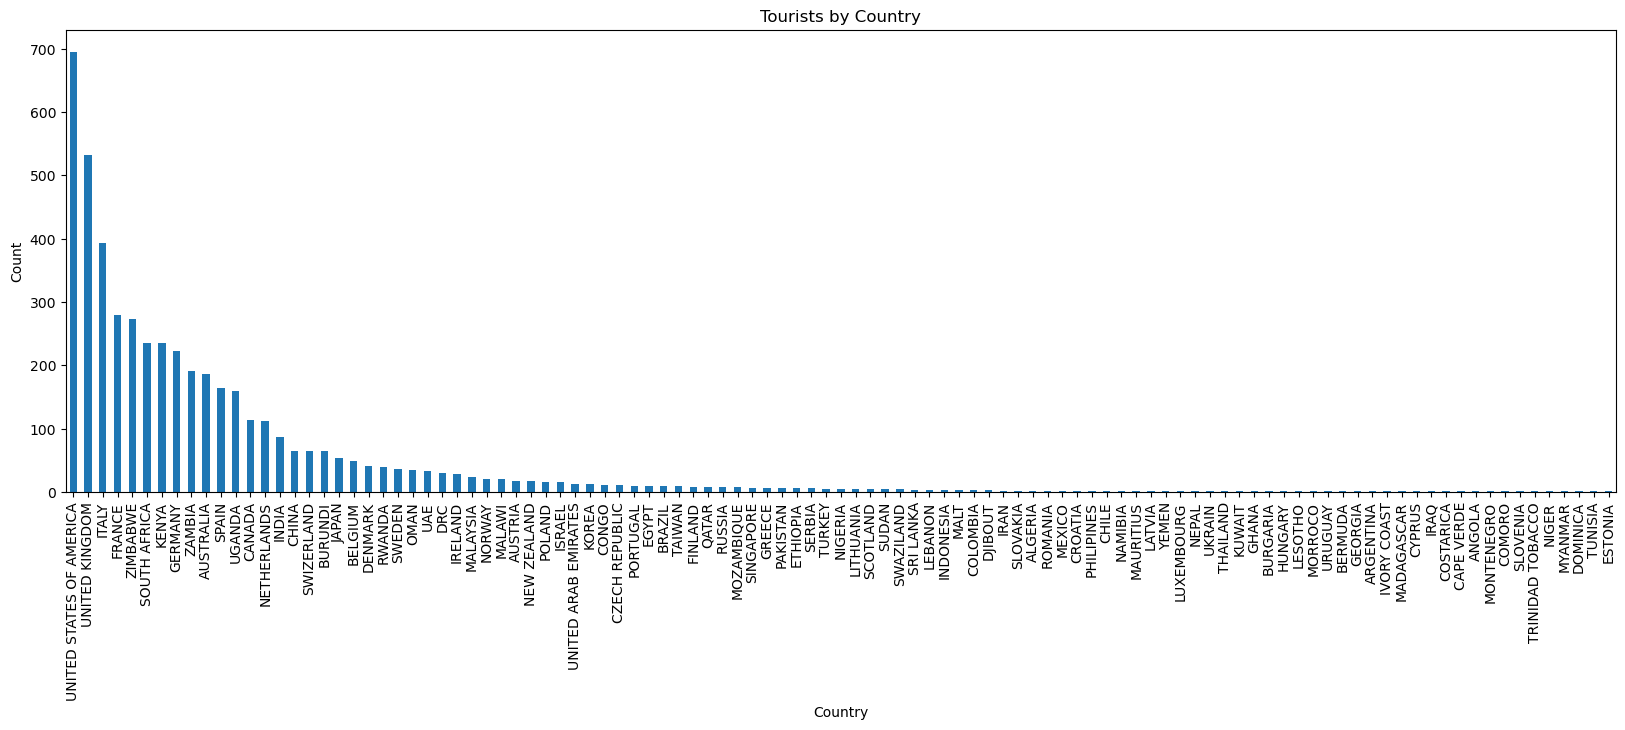

In [182]:
# Plotting the data
plt.figure(figsize=(20, 6))
data.country.value_counts().plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Tourists by Country')
plt.show()


In [183]:
countries = wbdata.get_country(country_id='all')
df_countries = pd.DataFrame(countries)

In [184]:
unique_countries = pd.Series(unique_countries).str.title()
unique_countries

0                    Swizerland
1                United Kingdom
2                         China
3                  South Africa
4      United States Of America
                 ...           
100                     Uruguay
101                     Morroco
102                    Thailand
103                     Bermuda
104                     Estonia
Length: 105, dtype: object

In [185]:
# Mapping the country to its code using wbdata. 
# If the country is not present in the list of countried provided by wbdata (due to any errors such as capitalization, etc), 
# then it is added to the list of countries not found.
country_keys_not_found = []
country_keys = {}
for country in unique_countries:
    if country not in df_countries['name'].values:
        country_keys_not_found.append(country)
    else:
        country_keys[country] = df_countries[df_countries['name'] == country]['id'].values[0]

In [186]:
# Mapping the countries not found to their respective codes

country_keys['Swizerland'] = 'CHE'
country_keys_not_found.remove('Swizerland')

country_keys['United States Of America'] = 'USA'
country_keys_not_found.remove('United States Of America')

country_keys['Malt'] = 'MLT'
country_keys_not_found.remove('Malt')

country_keys['Egypt'] = 'EGY'
country_keys_not_found.remove('Egypt')

country_keys['Uae'] = 'ARE'
country_keys_not_found.remove('Uae')

country_keys['Yemen'] = 'YEM'
country_keys_not_found.remove('Yemen')

country_keys['Congo'] = 'COG'
country_keys_not_found.remove('Congo')

country_keys['Burgaria'] = 'BGR'
country_keys_not_found.remove('Burgaria')

country_keys['Drc'] = 'COD'
country_keys_not_found.remove('Drc')

country_keys['Korea'] = 'KOR'
country_keys_not_found.remove('Korea')

country_keys['Swaziland'] = 'SWZ'
country_keys_not_found.remove('Swaziland')

country_keys['Czech Republic'] = 'CZE'
country_keys_not_found.remove('Czech Republic')

country_keys['Ukrain'] = 'UKR'
country_keys_not_found.remove('Ukrain')

country_keys['Russia'] = 'RUS'
country_keys_not_found.remove('Russia')

country_keys['Slovakia'] = 'SVK'
country_keys_not_found.remove('Slovakia')

country_keys['Cape Verde'] = 'CPV'           
country_keys_not_found.remove('Cape Verde')

country_keys['Costarica'] = 'CRI'
country_keys_not_found.remove('Costarica')

country_keys['Turkey'] = 'TUR'
country_keys_not_found.remove('Turkey')

country_keys['Trinidad Tobacco'] = 'TTO'
country_keys_not_found.remove('Trinidad Tobacco')

country_keys['Comoro'] = 'COM'
country_keys_not_found.remove('Comoro')

country_keys['Iran'] = 'IRN'
country_keys_not_found.remove('Iran')

country_keys['Philipines'] = 'PHL'
country_keys_not_found.remove('Philipines')

country_keys['Ivory Coast'] = 'CIV'
country_keys_not_found.remove('Ivory Coast')

country_keys['Djibout'] = 'DJI'
country_keys_not_found.remove('Djibout')

country_keys['Morroco'] = 'MAR'
country_keys_not_found.remove('Morroco')

In [187]:
# Making the country column consistent
data['country'] = data['country'].str.title()
data['country'] = data['country'].replace('Scotland', 'United Kingdom')
data['country'] = data['country'].replace('Taiwan', 'China')
country_keys_not_found.remove('Scotland')
country_keys_not_found.remove('Taiwan')

In [188]:
# Creating a column for country code
data['country_code'] = data['country'].map(country_keys)
cols = list(data.columns)
cols.remove('country_code')
cols.insert(2, 'country_code')
data = data[cols]


In [189]:
# Groupping the countries by income group
income_groups  = pd.read_csv('/Users/bharathbeeravelly/Desktop/End-to-End-ML-Project/data/income_groups.csv')

In [190]:
data.head()

,ID,country,country_code,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
0,tour_0,Swizerland,CHE,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",...,No,No,No,No,13.0,0.0,Cash,No,Friendly People,674602.5
1,tour_10,United Kingdom,GBR,25-44,NaN,1.0,0.0,Leisure and Holidays,Cultural tourism,others,...,No,No,No,No,14.0,7.0,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5
2,tour_1000,United Kingdom,GBR,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",...,No,No,No,No,1.0,31.0,Cash,No,Excellent Experience,3315000.0
3,tour_1002,United Kingdom,GBR,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",...,Yes,Yes,Yes,No,11.0,0.0,Cash,Yes,Friendly People,7790250.0
4,tour_1004,China,CHN,1-24,NaN,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",...,No,No,No,No,7.0,4.0,Cash,Yes,No comments,1657500.0


In [191]:
income_groups = income_groups.groupby('Entity').apply(lambda x: x[x['Year'] == x['Year'].max()]).reset_index(drop=True)
income_groups.drop(['Year'], axis = 1, inplace=True)


In [192]:
# 
data = data.merge(income_groups, left_on='country_code', right_on='Code', how='left')
data.drop(['Entity', 'Code'], axis=1, inplace=True)


In [193]:
data.head()

,ID,country,country_code,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,...,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost,World Bank income classification
0,tour_0,Swizerland,CHE,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",...,No,No,No,13.0,0.0,Cash,No,Friendly People,674602.5,High-income countries
1,tour_10,United Kingdom,GBR,25-44,NaN,1.0,0.0,Leisure and Holidays,Cultural tourism,others,...,No,No,No,14.0,7.0,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5,High-income countries
2,tour_1000,United Kingdom,GBR,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",...,No,No,No,1.0,31.0,Cash,No,Excellent Experience,3315000.0,High-income countries
3,tour_1002,United Kingdom,GBR,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",...,Yes,Yes,No,11.0,0.0,Cash,Yes,Friendly People,7790250.0,High-income countries
4,tour_1004,China,CHN,1-24,NaN,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",...,No,No,No,7.0,4.0,Cash,Yes,No comments,1657500.0,Upper-middle-income countries


In [194]:
# Rearranging the columns
data.rename(columns={'World Bank income classification': 'income_group'}, inplace=True)
data = data[['ID', 'country', 'country_code', 'income_group'] + [col for col in data.columns if col not in ['ID', 'country', 'country_code', 'income_group']]]


In [195]:
data.head()

,ID,country,country_code,income_group,age_group,travel_with,total_female,total_male,purpose,main_activity,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
0,tour_0,Swizerland,CHE,High-income countries,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,...,No,No,No,No,13.0,0.0,Cash,No,Friendly People,674602.5
1,tour_10,United Kingdom,GBR,High-income countries,25-44,NaN,1.0,0.0,Leisure and Holidays,Cultural tourism,...,No,No,No,No,14.0,7.0,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5
2,tour_1000,United Kingdom,GBR,High-income countries,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,...,No,No,No,No,1.0,31.0,Cash,No,Excellent Experience,3315000.0
3,tour_1002,United Kingdom,GBR,High-income countries,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,...,Yes,Yes,Yes,No,11.0,0.0,Cash,Yes,Friendly People,7790250.0
4,tour_1004,China,CHN,Upper-middle-income countries,1-24,NaN,1.0,0.0,Leisure and Holidays,Wildlife tourism,...,No,No,No,No,7.0,4.0,Cash,Yes,No comments,1657500.0


In [196]:
from sklearn.preprocessing import OrdinalEncoder

# Replacing the income groups with numbers
ordinal_encoder = OrdinalEncoder(categories=[['Low-income countries', 'Lower-middle-income countries', 'Upper-middle-income countries', 'High-income countries']])
data['income_group'] = ordinal_encoder.fit_transform(data[['income_group']])


In [197]:
data.head()

,ID,country,country_code,income_group,age_group,travel_with,total_female,total_male,purpose,main_activity,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
0,tour_0,Swizerland,CHE,3.0,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,...,No,No,No,No,13.0,0.0,Cash,No,Friendly People,674602.5
1,tour_10,United Kingdom,GBR,3.0,25-44,NaN,1.0,0.0,Leisure and Holidays,Cultural tourism,...,No,No,No,No,14.0,7.0,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5
2,tour_1000,United Kingdom,GBR,3.0,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,...,No,No,No,No,1.0,31.0,Cash,No,Excellent Experience,3315000.0
3,tour_1002,United Kingdom,GBR,3.0,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,...,Yes,Yes,Yes,No,11.0,0.0,Cash,Yes,Friendly People,7790250.0
4,tour_1004,China,CHN,2.0,1-24,NaN,1.0,0.0,Leisure and Holidays,Wildlife tourism,...,No,No,No,No,7.0,4.0,Cash,Yes,No comments,1657500.0


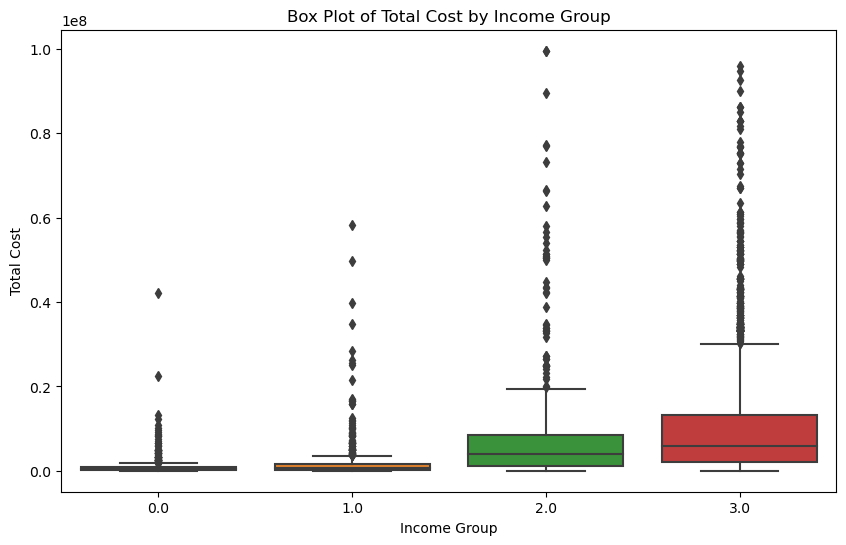

In [198]:
# Plotting the data
plt.figure(figsize=(10, 6))
sns.boxplot(x='income_group', y='total_cost', data=data)
plt.xlabel('Income Group')
plt.ylabel('Total Cost')
plt.title('Box Plot of Total Cost by Income Group')
plt.show()


In [199]:
data.head()

,ID,country,country_code,income_group,age_group,travel_with,total_female,total_male,purpose,main_activity,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
0,tour_0,Swizerland,CHE,3.0,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,...,No,No,No,No,13.0,0.0,Cash,No,Friendly People,674602.5
1,tour_10,United Kingdom,GBR,3.0,25-44,NaN,1.0,0.0,Leisure and Holidays,Cultural tourism,...,No,No,No,No,14.0,7.0,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5
2,tour_1000,United Kingdom,GBR,3.0,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,...,No,No,No,No,1.0,31.0,Cash,No,Excellent Experience,3315000.0
3,tour_1002,United Kingdom,GBR,3.0,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,...,Yes,Yes,Yes,No,11.0,0.0,Cash,Yes,Friendly People,7790250.0
4,tour_1004,China,CHN,2.0,1-24,NaN,1.0,0.0,Leisure and Holidays,Wildlife tourism,...,No,No,No,No,7.0,4.0,Cash,Yes,No comments,1657500.0


## Exploring `age_group`

In [200]:
# Exploring age_group

data['age_group'].value_counts()

age_group
25-44    2487
45-64    1391
1-24      624
65+       307
Name: count, dtype: int64

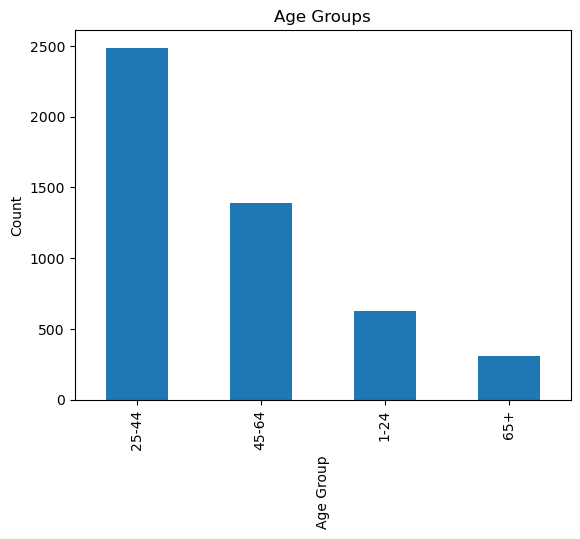

In [201]:
data['age_group'].value_counts().plot(kind='bar')
plt.xlabel('Age Group', rotation=90)
plt.ylabel('Count')
plt.title('Age Groups')
plt.show()


In [202]:
# Define the categories and labels
categories = [['1-24', '25-44', '45-64', '65+']]

# Create an instance of the OrdinalEncoder with the defined categories and labels
ordinal_encoder = OrdinalEncoder(categories=categories, dtype=int)

# Encode the age_group column using the ordinal_encoder
data['age_group'] = ordinal_encoder.fit_transform(data[['age_group']])


In [203]:
data.head()

,ID,country,country_code,income_group,age_group,travel_with,total_female,total_male,purpose,main_activity,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
0,tour_0,Swizerland,CHE,3.0,2,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,...,No,No,No,No,13.0,0.0,Cash,No,Friendly People,674602.5
1,tour_10,United Kingdom,GBR,3.0,1,NaN,1.0,0.0,Leisure and Holidays,Cultural tourism,...,No,No,No,No,14.0,7.0,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5
2,tour_1000,United Kingdom,GBR,3.0,1,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,...,No,No,No,No,1.0,31.0,Cash,No,Excellent Experience,3315000.0
3,tour_1002,United Kingdom,GBR,3.0,1,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,...,Yes,Yes,Yes,No,11.0,0.0,Cash,Yes,Friendly People,7790250.0
4,tour_1004,China,CHN,2.0,0,NaN,1.0,0.0,Leisure and Holidays,Wildlife tourism,...,No,No,No,No,7.0,4.0,Cash,Yes,No comments,1657500.0


In [204]:
data['age_group'].isna().sum()

0